In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
np.random.seed(33)

class Pandemic_Agent_Model:
    """
    Agent-Based Model for Pandemic Spread Simulation
    
    States:
    - 0: Susceptible (S)
    - 1: Infected (I)
    - 2: Recovered (R)
    """
    
    def __init__(self, grid_size=75, n_agents=100, n_infected=5, 
                 p_infection=0.1, p_recovery=0.05):
        """
        grid_size : Size of the square grid
        n_agents : Total number of agents
        n_infected : Initial number of infected agents
        p_infection : Probability of infection at each timestep
        p_recovery : Probability of recovery at each timestep
        """
        self.grid_size = grid_size
        self.n_agents = n_agents
        self.p_infection = p_infection
        self.p_recovery = p_recovery
        
        # Initialize agent positions on 75*75 grid
        self.positions = np.random.randint(0, grid_size, size=(n_agents, 2))
        
        # Initialize agent states to Susceptible (0)
        self.states = np.zeros(n_agents, dtype=int)
        infected_indices = np.random.choice(n_agents, size=n_infected, replace=False)
        self.states[infected_indices] = 1  # Initialize infected agents
        
        self.history = {'S': [], 'I': [], 'R': []}
        
    def get_neighbors(self, position):
        """Get valid neighboring positions"""
        x, y = position
        neighbors = [
            (x, y),     
            (x-1, y),    
            (x+1, y),    
            (x, y-1),    
            (x, y+1)  
        ]
        
        # Filter valid positions within boundary
        valid_neighbors = [(nx, ny) for nx, ny in neighbors 
                          if 0 <= nx < self.grid_size and 0 <= ny < self.grid_size]
        return valid_neighbors
    
    def move_agent(self, agent_idx):
        """Move a single agent according to random walk (Brownian motion)"""
        current_pos = self.positions[agent_idx]
        neighbors = self.get_neighbors(current_pos)
        
        # Choose random neighbor
        new_pos = neighbors[np.random.randint(len(neighbors))]
        self.positions[agent_idx] = np.array(new_pos)
    
    def transmission_step(self):
        """infection transmission"""
        # Find all infected agents' positions
        infected_cells = set()
        for agent_idx in range(self.n_agents):
            if self.states[agent_idx] == 1:  # Infected
                infected_cells.add(tuple(self.positions[agent_idx]))
        
        # Check susceptible agents for infection
        for agent_idx in range(self.n_agents):
            # if the agent is susceptible
            if self.states[agent_idx] == 0: 
                agent_pos = tuple(self.positions[agent_idx])
                # if in contact with infected cell
                if agent_pos in infected_cells:
                    if np.random.random() < self.p_infection:
                        self.states[agent_idx] = 1
    
    def recovery_step(self):
        """recovery of infected agents"""
        for agent_idx in range(self.n_agents):
            # Convert infected to recovered
            if self.states[agent_idx] == 1: 
                if np.random.random() < self.p_recovery:
                    self.states[agent_idx] = 2

    def record_state(self):
        """ Record current counts of S, I, R """
        self.history['S'].append(np.sum(self.states == 0))
        self.history['I'].append(np.sum(self.states == 1))
        self.history['R'].append(np.sum(self.states == 2))
    
    def step(self):
        """Execute one time step of the simulation"""
        for agent_idx in range(self.n_agents):
            self.move_agent(agent_idx)
        
        self.transmission_step()
        self.recovery_step()
        self.record_state()
    
    def run(self, n_steps=200):
        """Run the simulation for n_steps"""
        # Record initial state
        self.record_state()
        
        for _ in range(n_steps):
            self.step()
        
        return self.history

def plot_sir_curves(history, title="SIR Dynamics Over Time"):
    """Plot S, I, R curves over time"""
    plt.figure(figsize=(10, 6))
    time_steps = range(len(history['S']))
    
    plt.plot(time_steps, history['S'], label='Susceptible', color='blue', linewidth=2)
    plt.plot(time_steps, history['I'], label='Infected', color='red', linewidth=2)
    plt.plot(time_steps, history['R'], label='Recovered', color='green', linewidth=2)
    
    plt.xlabel('Time Steps', fontsize=12)
    plt.ylabel('Number of Agents', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


def run_multiple_simulations(n_runs=10, **kwargs):
    """Run multiple simulations and compute average"""
    all_histories = []
    for _ in range(n_runs):
        model = Pandemic_Agent_Model(**kwargs)
        history = model.run(n_steps=200)
        all_histories.append(history)
    
    avg_history = {
        'S': np.mean([h['S'] for h in all_histories], axis=0),
        'I': np.mean([h['I'] for h in all_histories], axis=0),
        'R': np.mean([h['R'] for h in all_histories], axis=0)
    }
    
    return avg_history, all_histories

def analyze_peak_metrics(history):
    """Extract key metrics from simulation"""
    infected = np.array(history['I'])
    return {
        'peak_infected': np.max(infected),
        'time_to_peak': np.argmax(infected)
    }



[A.iii] Running single simulation with p=0.1, q=0.05...


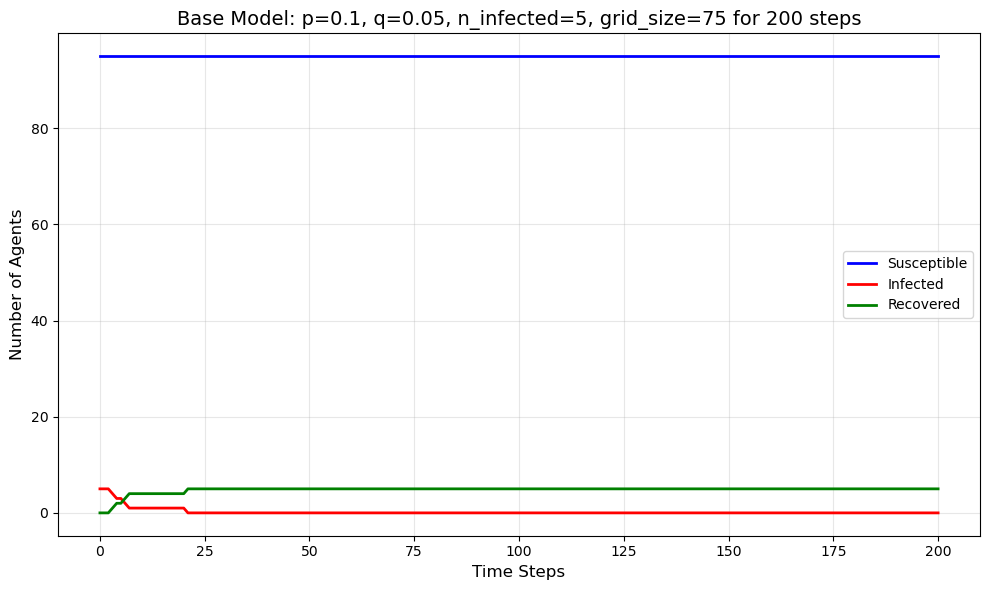


[A.iv] Sensitivity Analysis for different p and q values...
Running simulation for p=0.05, q=0.02, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.05, q=0.05, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.1, q=0.02, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0
Running simulation for p=0.1, q=0.05, n_infected=5, grid_size=75...
Peak infected: 5, Time to peak: 0


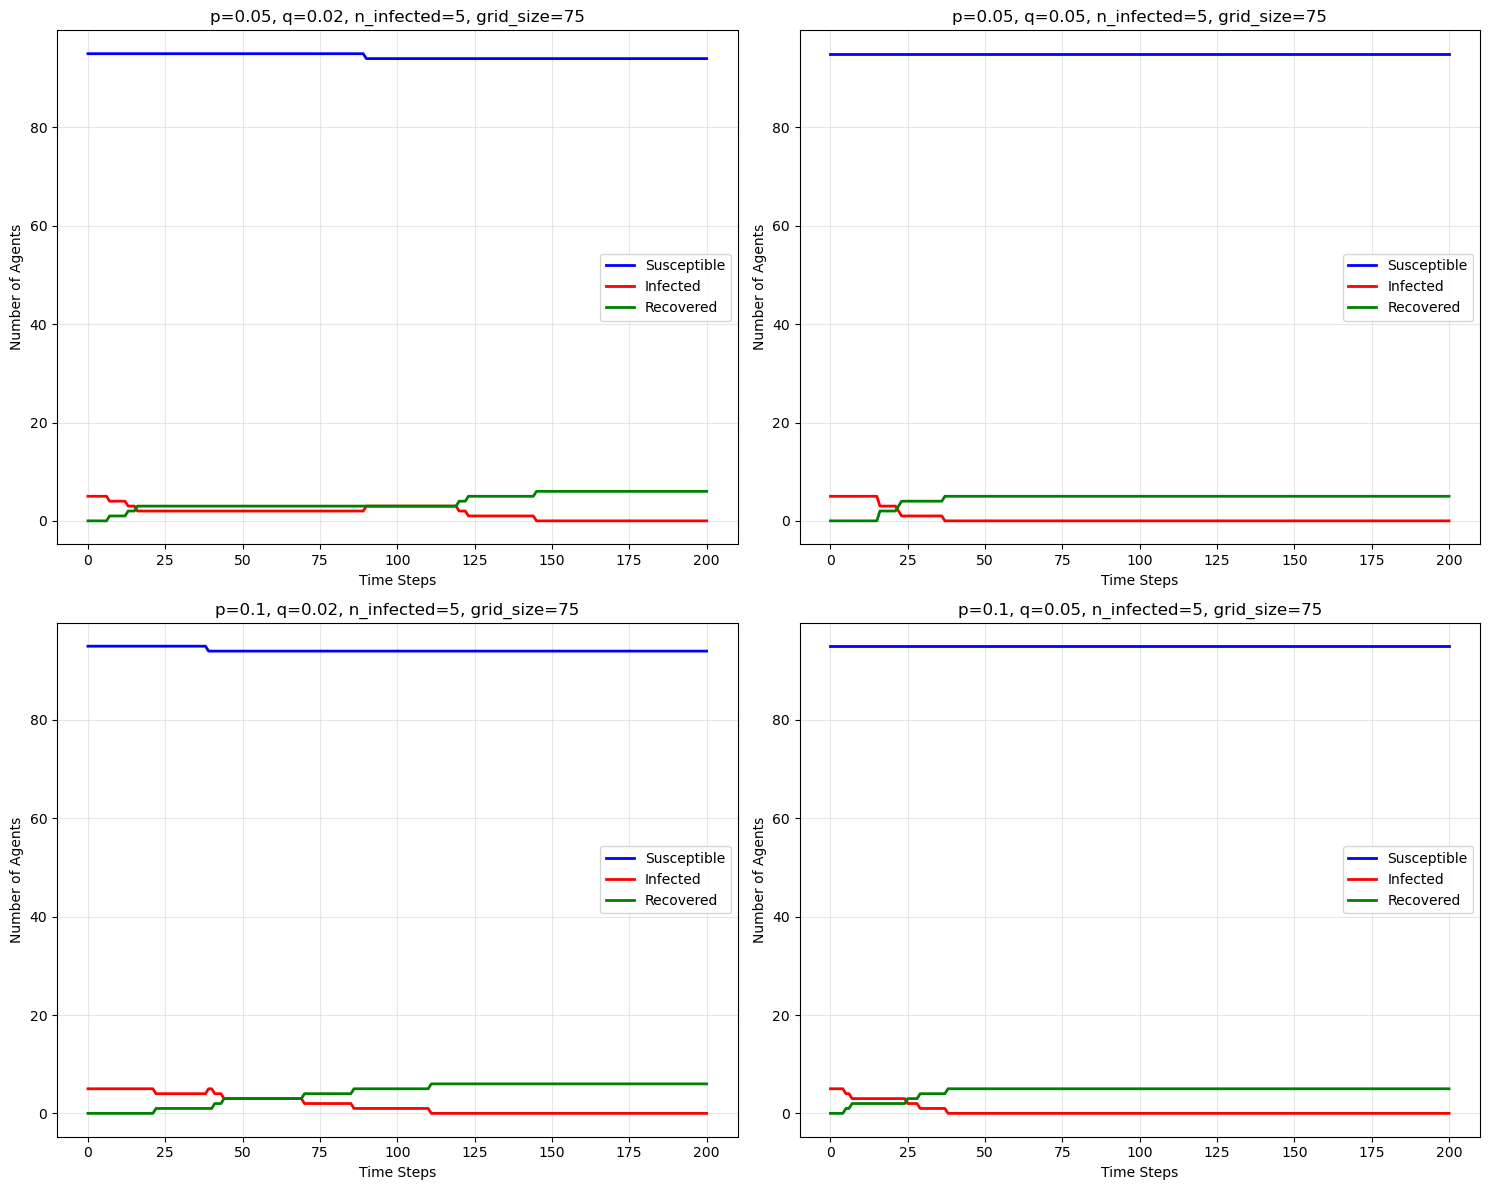


[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=10, p=0.5, q=0.05)...


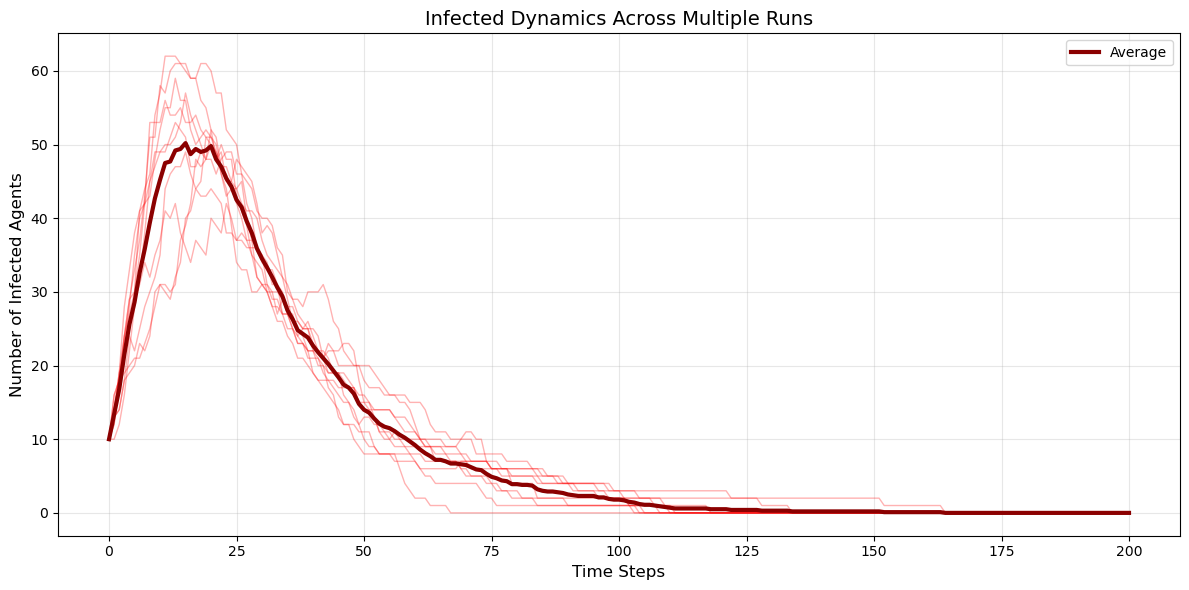

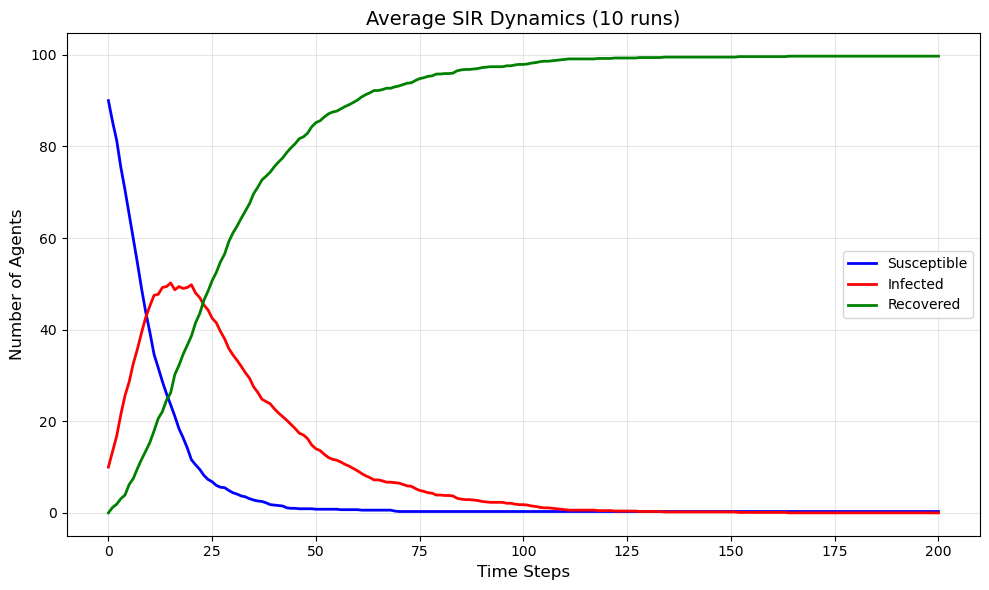

In [47]:
# Part A: Base Model

# A.iii: Single simulation
print("\n[A.iii] Running single simulation with p=0.1, q=0.05...")
model = Pandemic_Agent_Model(n_agents=100, n_infected=5, p_infection=0.1, p_recovery=0.05)
history = model.run(n_steps=200)
plot_sir_curves(history, "Base Model: p=0.1, q=0.05, n_infected=5, grid_size=75 for 200 steps")

# A.iv: Sensitivity Analysis
print("\n[A.iv] Sensitivity Analysis for different p and q values...")
parameter_combinations = [
    (0.05, 0.02, "p=0.05, q=0.02, n_infected=5, grid_size=75"),
    (0.05, 0.05, "p=0.05, q=0.05, n_infected=5, grid_size=75"),
    (0.1, 0.02, "p=0.1, q=0.02, n_infected=5, grid_size=75"),
    (0.1, 0.05, "p=0.1, q=0.05, n_infected=5, grid_size=75"),
]

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for idx, (p, q, label) in enumerate(parameter_combinations):
    print(f"Running simulation for {label}...")
    model = Pandemic_Agent_Model(p_infection=p, p_recovery=q)
    history = model.run(n_steps=200)
    
    ax = axes[idx]
    time_steps = range(len(history['S']))
    ax.plot(time_steps, history['S'], label='Susceptible', color='blue', linewidth=2)
    ax.plot(time_steps, history['I'], label='Infected', color='red', linewidth=2)
    ax.plot(time_steps, history['R'], label='Recovered', color='green', linewidth=2)
    ax.set_xlabel('Time Steps')
    ax.set_ylabel('Number of Agents')
    ax.set_title(label)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    metrics = analyze_peak_metrics(history)
    print(f"Peak infected: {metrics['peak_infected']}, Time to peak: {metrics['time_to_peak']}")

plt.tight_layout()
plt.show()

# A.iv: Simulations with random initial conditions
print("\n[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=10, p=0.5, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=10, p_infection=0.5, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=30, p=0.9, q=0.05)...


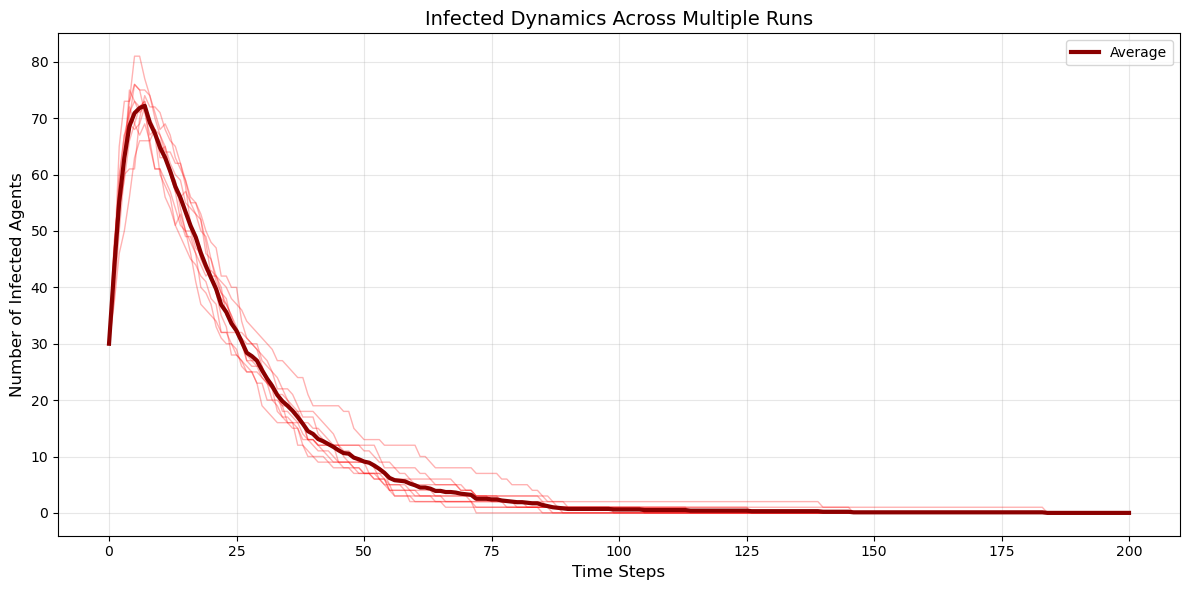

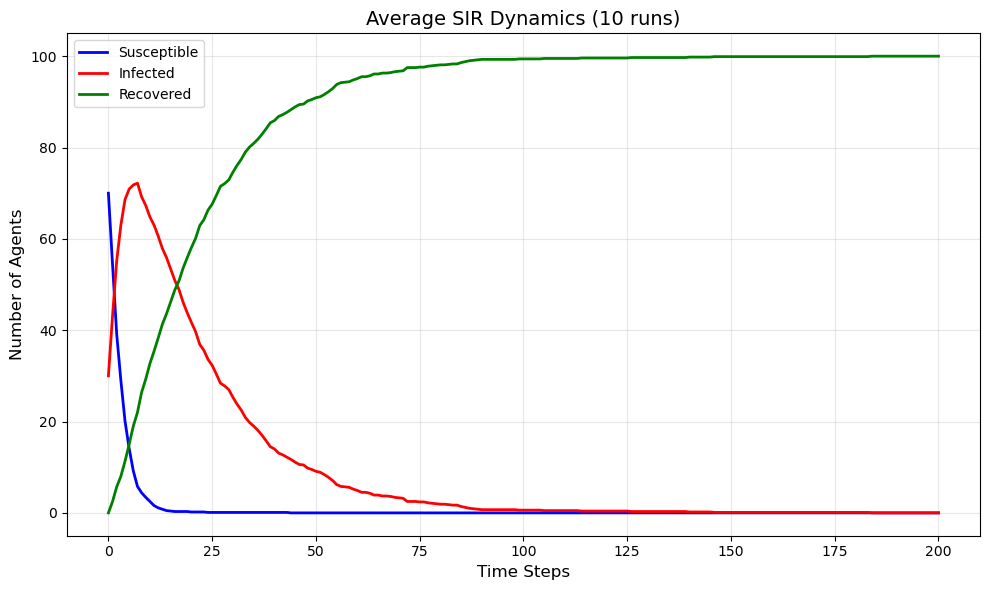

In [48]:
# A.iv: Another set of simulations with random initial conditions under smaller grid size
print("\n[A.iv] Running 10 simulations with random initial conditions (grid_size=10, n_infected=30, p=0.9, q=0.05)...")
avg_history, all_histories = run_multiple_simulations(n_runs=10, grid_size=10, n_agents=100, n_infected=30, p_infection=0.9, p_recovery=0.05)

# Plot individual runs
plt.figure(figsize=(12, 6))
for history in all_histories:
    plt.plot(range(len(history['I'])), history['I'], alpha=0.3, color='red', linewidth=1)
plt.plot(range(len(avg_history['I'])), avg_history['I'], 
         color='darkred', linewidth=3, label='Average')
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Infected Agents', fontsize=12)
plt.title('Infected Dynamics Across Multiple Runs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot average for all compartments
plt.figure(figsize=(10, 6))
time_steps = range(len(avg_history['S']))
plt.plot(time_steps, avg_history['S'], label='Susceptible', color='blue', linewidth=2)
plt.plot(time_steps, avg_history['I'], label='Infected', color='red', linewidth=2)
plt.plot(time_steps, avg_history['R'], label='Recovered', color='green', linewidth=2)
plt.xlabel('Time Steps', fontsize=12)
plt.ylabel('Number of Agents', fontsize=12)
plt.title('Average SIR Dynamics (10 runs)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Part B: Extending the Model


